# NLP Final Project

## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## TASKS

###   2.1 Corpus Creation

In [106]:
# We create a NLTK corpus from this text file
corpus = PlaintextCorpusReader('.', 'toyStory1.csv')

##### Word Tokenization

In [97]:
#Applying tokenization
raw_text = corpus.raw()
tokens = nltk.word_tokenize(raw_text)
print(tokens[:50])

['1', 'Transcript', ':', '1.1', '01', 'Sheriff', 'Woody', '1.2', '02', 'Opening', 'Credits', '(', '``', "''", 'You', "'ve", 'Got', 'a', 'Friend', 'in', 'Me', "''", "''", ')', '1.3', '03', 'The', 'Coast', 'Is', 'Clear', '1.4', '04', 'The', 'Staff', 'Meeting', '1.5', '05', 'Recon', 'Plan', 'Charlie', '1.6', '06', 'Buzz', 'Lightyear', ',', 'Space', 'Ranger', '1.7', '07', '``']


Sentence Tokenization

In [98]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['\n\n1 Transcript:\n\n1.1 01 Sheriff Woody\n1.2 02 Opening Credits (""You\'ve Got a Friend in Me"")\n1.3 03 The Coast Is Clear\n1.4 04 The Staff Meeting\n1.5 05 Recon Plan Charlie\n1.6 06 Buzz Lightyear, Space Ranger\n1.7 07 ""Strange Things""\n1.8 08 Woody Vs. Buzz\n1.9 09 Sid\n1.10 10 Who Will Andy Pick?', '1.11 11 Buzz Hitches a Ride\n1.12 12 Lost at the Gas Station\n1.13 13 Pizza Planet\n1.14 14 Sid\'s House\n1.15 15 Back at Andy\'s\n1.16 16 Playtime with Sid\n1.17 17 The Buzz Lightyear Commercial\n1.18 18 ""I Will Go Sailing No More""\n1.19 19 Hannah\'s Tea Party\n1.20 20 Sid\'s Window to Andy\'s Window\n1.21 21 The Big One\n1.22 22 Andy Misses Woody\n1.23 23 ""Buzz, I Can\'t Do This Without You""\n1.24 24 Woody Asks for Help\n1.25 25 ""Wind the Frog""\n1.26 26 ""Play Nice!""', "1.27 27 The Chase\n1.28 28 Rocket Power\n1.29 29 Christmas in Andy's New House\n\n\n\n\n\nTranscript:[]\n01 Sheriff Woody[]\n[The Walt Disney Pictures logo plays, except the castle is in CGI, while the ca

---

#### Lemmatization

In [99]:
# Filtering out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Creating a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)

#### Word Frequency

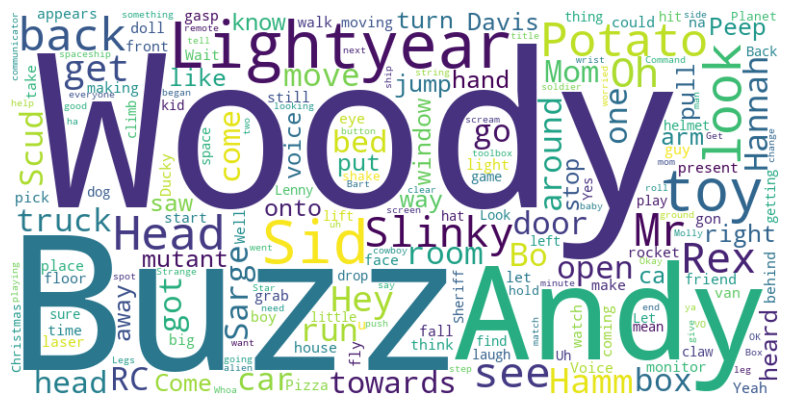

In [100]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# We display our wordcloud with aid of matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Woody: 678 times
Buzz: 508 times
Andy: 197 times
Lightyear: 180 times
Sid: 153 times
toy: 143 times
look: 109 times
Potato: 96 times
Head: 96 times
back: 89 times


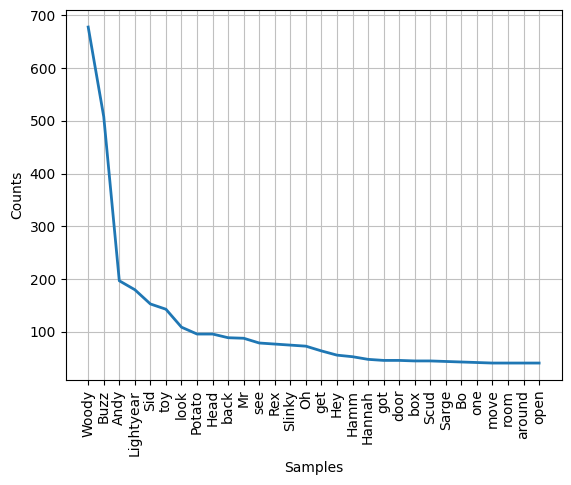

In [101]:
# We get the most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# We plot the frequency for the 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

### Collocations

#### Bigrams

In [104]:
bigram_finder = BigramCollocationFinder.from_words(lemmatized_tokens)
# We score brigrams by their frequency
#The score divides the count of the bigrams divided by the total amount of trigrams.
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
for bigram, score in bigram_scores[:10]:
    print(f"{bigram}: {score}")

('Buzz', 'Lightyear'): 0.016322787712058688
('Potato', 'Head'): 0.008803301237964236
('Mr', 'Potato'): 0.007427785419532325
('Woody', 'Buzz'): 0.00541036221916552
('Bo', 'Peep'): 0.0028427326914259514
('mutant', 'toy'): 0.0024759284731774417
('Buzz', 'Buzz'): 0.0021091242549289317
('Woody', 'look'): 0.0018340210912425492
('Woody', 'Oh'): 0.0017423200366804218
('Woody', 'Woody'): 0.0017423200366804218


#### Trigrams

In [105]:
trigram_finder = TrigramCollocationFinder.from_words(lemmatized_tokens)
# We score trigrams by their frequency
trigram_scores = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
# Print the top 10 trigrams
#The score divides the count of the trigram divided by the total amount of trigrams.
for trigram, score in trigram_scores[:10]:
    print(f"{trigram}: {score}")

('Mr', 'Potato', 'Head'): 0.007427785419532325
('Buzz', 'Lightyear', 'Woody'): 0.0012838147638697846
('Woody', 'Voice', 'Box'): 0.0009170105456212746
('Buzz', 'Buzz', 'Lightyear'): 0.0007336084364970197
('Buzz', 'Lightyear', 'Buzz'): 0.0006419073819348923
('Head', 'Mr', 'Potato'): 0.0006419073819348923
('Potato', 'Head', 'Mr'): 0.0006419073819348923
('Woody', 'Buzz', 'Lightyear'): 0.0005502063273727648
('Woody', 'Buzz', 'look'): 0.0005502063273727648
('Lightyear', 'Buzz', 'Lightyear'): 0.0004585052728106373
